In [1]:
## Подключаем необходимые библиотеки
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-darkgrid')
import pandas as pd
import yfinance as yf
import matplotlib
from pandas_datareader import data as pdr
from yahoo_fin.stock_info import get_data
import yahoo_fin.stock_info as si
from pandas_datareader import data as web
import datetime
from nsepy import get_history
from nsepython import *
import logging
urllib3_logger = logging.getLogger('urllib3') # Обработчик сообщений, чтобы они не выводились при сборе данных о тикерах
urllib3_logger.setLevel(logging.CRITICAL)
logging.getLogger('matplotlib.font_manager').disabled = True

In [2]:
# Задаем список тикеров. Здесь вручную.
list_of_tickers = si.tickers_sp500()
# Задаем диапазон дат в котором нужно собирать все данные по тикерам
start = datetime.datetime(2010,1,1)
end = datetime.datetime.today().date() # сегодняшняя дата, чтобы не менять вручную.
# Получаем данные из Yahoo. Именно этот способ позволяет получить данные с тикерами в столбцах.
f = pdr.DataReader(list_of_tickers, 'yahoo', start, end)

INFO:numexpr.utils:NumExpr defaulting to 4 threads.


In [3]:
f.head(5)

Attributes  Adj Close                                                       \
Symbols             A       AAL        AAP      AAPL ABBV        ABC  ABMD   
Date                                                                         
2009-12-31  20.363510  4.562870  38.947552  6.471691  NaN  21.867466  8.73   
2010-01-04  20.514248  4.496876  38.851337  6.572422  NaN  22.337193  8.74   
2010-01-05  20.291416  5.005957  38.620422  6.583784  NaN  22.177824  8.53   
2010-01-06  20.219320  4.798555  38.957184  6.479061  NaN  21.968113  8.40   
2010-01-07  20.193102  4.939965  38.947552  6.467082  NaN  21.615824  8.40   

Attributes                                   ...     Volume             \
Symbols           ABT        ACN       ADBE  ...        XEL       XLNX   
Date                                         ...                         
2009-12-31  19.828472  33.159130  36.779999  ...  1364700.0  2249000.0   
2010-01-04  20.001087  33.614555  37.090000  ...  2670400.0  2824700.0   
2010-01-05  19.839491  33.822308  37.700001  ...  4321400.0  3469700.0   
2010-01-06  19.949661  34.181858  37.619999  ...  2164500.0  6329200.0   
2010-01-07  20.114939  34.149891  36.889999  ...  3041700.0  9252700.0   

Attributes                                                             \
Symbols            XOM       XRAY XYL        YUM        ZBH      ZBRA   
Date                                                                    
2009-12-31  18852300.0   489300.0 NaN  1790217.0   562300.0  184800.0   
2010-01-04  27809100.0  1051400.0 NaN  2962274.0   782400.0  168800.0   
2010-01-05  30174700.0   763400.0 NaN  3298757.0  1718100.0  168800.0   
2010-01-06  35044700.0  1595100.0 NaN  4178981.0  1277300.0  385300.0   
2010-01-07  27192100.0  1096100.0 NaN  2452472.0  1683500.0  183600.0   

Attributes                  
Symbols           ZION ZTS  
Date                        
2009-12-31   3239800.0 NaN  
2010-01-04   3974600.0 NaN  
2010-01-05   5605500.0 NaN  
2010-01-06  12615200.0 NaN  
2010-01-07  24716800.0 NaN  

[5 rows x 3030 columns]

In [98]:
stocks_price = pd.DataFrame(f["Close"]).loc['2019':'2021'].fillna(0)
stocks_volume = pd.DataFrame(f["Volume"]).loc['2019':'2021'].fillna(0)

In [99]:
stocks_price.head(3)

Symbols,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,ADBE,...,XEL,XLNX,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-02,65.690002,32.480000,157.919998,39.480000,89.230003,74.449997,309.959991,69.500000,140.589996,224.570007,...,48.220001,86.849998,69.690002,37.889999,66.510002,91.440002,102.279999,156.240005,41.580002,84.480003
2019-01-03,63.270000,30.059999,162.850006,35.547501,86.290001,73.370003,302.290009,66.220001,135.789993,215.699997,...,48.029999,83.580002,68.620003,37.910000,64.230003,89.139999,100.430000,146.880005,41.349998,81.559998
2019-01-04,65.459999,32.040001,158.809998,37.064999,89.070000,74.220001,313.440002,68.110001,141.070007,226.190002,...,48.500000,87.449997,71.150002,39.009998,66.940002,91.459999,103.860001,152.970001,42.619999,84.760002


In [100]:
stocks_volume.head(3)

Symbols,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,ADBE,...,XEL,XLNX,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-02,2113300.0,5229500.0,1291000.0,148158800.0,6908400.0,1149700.0,590000.0,8737200.0,2059300.0,2784100.0,...,4476100.0,2478400.0,16727200.0,2899400.0,990900.0,1743400.0,1152100.0,347700.0,2234100.0,2665600.0
2019-01-03,5383900.0,16822000.0,1514700.0,365248800.0,7653200.0,1499400.0,665300.0,10570700.0,2801300.0,3663500.0,...,5287600.0,2666200.0,13866100.0,2382100.0,1243100.0,2680300.0,1166100.0,514600.0,2078400.0,2390900.0
2019-01-04,3123700.0,9369600.0,1423000.0,234428400.0,8910600.0,2417700.0,624300.0,8299100.0,2296400.0,4043400.0,...,5535600.0,3011700.0,16043600.0,2787800.0,970900.0,2142700.0,1580400.0,723300.0,2370500.0,3383500.0


## Filter the stocks

The assets are filtered on the basis of turnover. The following steps are performed:

1. Multiply price and volume over `n` periods 
2. Take an average or mean of the above product to get average dollar volume
3. Average dollar volume or average daily turnover (defined as number of shares traded to the number of shares outstanding) are used to predict the magnitude and the persistence of future price momentum
4. Momentum is stronger among high average turnover or average dollar volume stocks

For illustration, the value of `n` is taken as 90. This can be changed.

In [101]:
# Filter the top 100 stocks
filtered_stocks = (stocks_price[:90] * stocks_volume[:90]
                   ).mean().sort_values(ascending=False).index[:100]

filtered_stocks_prices = stocks_price[filtered_stocks].dropna()

# Print columns of the filtered_stocks_prices dataframe
filtered_stocks

Index(['AMZN', 'AAPL', 'NFLX', 'FB', 'MSFT', 'TSLA', 'BA', 'NVDA', 'GOOGL',
       'AMD', 'BAC', 'GOOG', 'LLY', 'DIS', 'JPM', 'UNH', 'INTC', 'V', 'QCOM',
       'MU', 'WFC', 'CSCO', 'C', 'PFE', 'T', 'XOM', 'BMY', 'JNJ', 'CVX', 'GE',
       'MRK', 'BKNG', 'PG', 'BRK-B', 'VZ', 'CRM', 'HD', 'MA', 'CVS', 'AVGO',
       'ADBE', 'CMCSA', 'PYPL', 'ORCL', 'KO', 'SBUX', 'WMT', 'EA', 'UNP', 'DD',
       'GS', 'TWTR', 'MCD', 'CAT', 'TXN', 'PEP', 'MO', 'AMGN', 'IBM', 'BIIB',
       'NKE', 'ANTM', 'ABBV', 'MDT', 'MS', 'ATVI', 'CI', 'MMM', 'RTX', 'GILD',
       'XLNX', 'PM', 'HON', 'LOW', 'COP', 'NOW', 'ABT', 'COST', 'SLB', 'TMO',
       'OXY', 'FISV', 'EBAY', 'CMG', 'CHTR', 'STZ', 'WBA', 'LRCX', 'ISRG',
       'MPC', 'AMAT', 'NEM', 'KHC', 'F', 'DAL', 'EOG', 'NEE', 'AXP', 'INTU',
       'LMT'],
      dtype='object', name='Symbols')

## Cross sectional momentum strategy

We backtest the strategies tweaking the parameters in 2 ways:


1. **Long short with skip period**: For the above strategy we add 5 skip_days between the lookback and the holding periods, to safeguard against any microstructure effects (bid-ask spread, lead-lag effect, short-term price pressure) affecting the inference
2. **Long only**: Only long trading signals are generated for top 20 percentile with above-used lookback, holding and skip periods

## Long-short cross-sectional momentum strategy with skip-days

Long trading signals are generated for top 10 percentile and short signals for bottom 10 percentile with <br>
a. Lookback days = 175 <br> 
b. Skip days = 5 <br> 
c. Holding days = 41

These values are for illustration and can be changed.

**Strategy logic:**
1. Calculate the stock returns over the lookback period by skipping 1 week (to avoid short term price reversal) and holding period. 
2. Rank the stock returns based on the lookback returns
3. Long stocks with highest 10 percentile lookback retuns and short stocks with lowest 10 percentile lookback returns
4. Include transation cost
5. Calculate the strategy returns 

For illustration, the transaction cost is taken as 0.1%.

In [110]:
txn_cost = 0.001

def strategy_skip_recent(prices, lookback_days, skip_days, hold_days):
    global txn_cost
    # Calculate stock returns for the given lookback period with skip_days
    lookback_returns = prices.pct_change(lookback_days).shift(skip_days)
    hold_returns = prices.pct_change(hold_days).shift(-hold_days)

    n = len(lookback_returns.columns)
    lookback_rank = lookback_returns.dropna().rank(axis=1)

    def signal(rank):
        signal = np.where(rank > n*9/10, 1, np.nan)
        signal = np.where(rank < n/10, -1, signal)
        return signal

    lookback_signal = lookback_rank.apply(signal, axis=0)

    stocks_returns = hold_returns[lookback_days + skip_days::hold_days] * lookback_signal[::hold_days]
    trading_signal = lookback_signal[::hold_days]
    trading_signal = trading_signal.replace(np.nan, 0)
    cost = (txn_cost * np.abs(trading_signal - trading_signal.shift(1)))
    stocks_returns = stocks_returns - cost
    print(stocks_returns)
    print(trading_signal)
    portfolio_returns = stocks_returns.mean(axis=1)
    print(portfolio_returns)
    sharpe = np.mean(portfolio_returns) / \
        np.std(portfolio_returns)*((252/hold_days)**0.5)
    print('Sharpe Ratio %.2f' % sharpe)
    print((portfolio_returns+1).cumprod())
    (portfolio_returns+1).cumprod().plot(figsize=(8, 7))
    
    plt.ylabel('Strategy Returns', fontsize=12)
    plt.title('Long Short Skip CS Strategy Returns', fontsize=14)
    plt.show()
    return portfolio_returns

Symbols         AMZN      AAPL      NFLX  FB      MSFT      TSLA        BA  \
Date                                                                         
2019-09-19       NaN       NaN       NaN NaN       NaN       NaN       NaN   
2019-11-15       NaN  0.185183 -0.148748 NaN  0.107022       NaN  0.105758   
2020-01-16       NaN -0.197881  0.055726 NaN       NaN -0.163204  0.626084   
2020-03-17       NaN  0.224156       NaN NaN       NaN  0.867341  0.013050   
2020-05-14       NaN  0.254216  0.186646 NaN       NaN  0.888141 -0.468822   
2020-07-14  0.028543       NaN -0.084229 NaN       NaN  0.224090  0.123750   
2020-09-10  0.042915  0.044819  0.070859 NaN       NaN  0.157834 -0.000317   
2020-11-06 -0.045060  0.103041       NaN NaN       NaN  0.897988 -0.348485   
2021-01-07       NaN -0.075084       NaN NaN       NaN -0.174575       NaN   
2021-03-09       NaN       NaN       NaN NaN       NaN -0.014905       NaN   
2021-05-06       NaN       NaN       NaN NaN       NaN       NaN

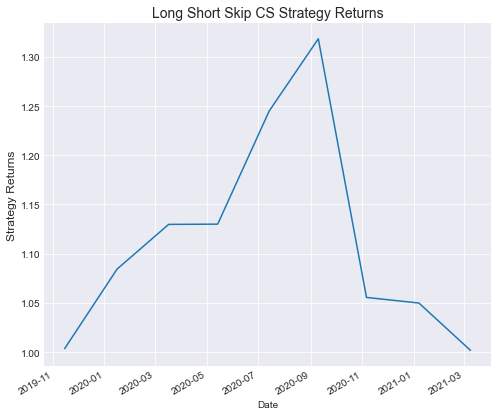

In [111]:
# Call the function strategy_skip_recent with below inputs
lookback_days = 175
skip_days = 5
hold_days = 41
portfolio_returns = strategy_skip_recent(
    filtered_stocks_prices, lookback_days, skip_days, hold_days)

In [104]:
portfolio_returns['str_return'] = (portfolio_returns+1).cumprod()
cumulative_return = portfolio_returns['str_return'][-2] - 1
print("Доходность Long-short cross-sectional momentum strategy with skip-days")
print("cumulative_return =", "%.2f%%" % (100 * cumulative_return))

Доходность Long-short cross-sectional momentum strategy with skip-days
cumulative_return = 0.18%


In [105]:
portfolio_returns['str_return']

Date
2019-09-19         NaN
2019-11-15    1.003601
2020-01-16    1.084354
2020-03-17    1.129757
2020-05-14    1.130005
2020-07-14    1.245054
2020-09-10    1.318293
2020-11-06    1.055551
2021-01-07    1.049864
2021-03-09    1.001787
2021-05-06         NaN
dtype: float64


## Long-only cross-sectional momentum strategy

Long only strategy on top 20 percentile stocks with <br> 
a. Lookback days = 175 <br>
b. Skip days = 5 <br>
c. Holding days = 41

These values are for illustration and can be changed.

**Strategy logic:**
1. Calculate the stock returns over the lookback period by skipping 1 week (to avoid short term price reversal) and holding period. 
2. Rank the stock returns based on the lookback returns
3. Long stocks with highest 20 percentile lookback retuns
4. Include trading cost
5. Calculate the strategy returns 

For illustration, the transaction cost is taken as 0.1%.

In [141]:
txn_cost = 0.001

def strategy_long_only(prices, lookback_days, skip_days, hold_days):
    global txn_cost
    lookback_returns = prices.pct_change(lookback_days).shift(skip_days)
    hold_returns = prices.pct_change(hold_days).shift(-hold_days)
    print(hold_returns.loc['2020-09':'2020-10'])
    n = len(lookback_returns.columns)
    lookback_rank = lookback_returns.dropna().rank(axis=1)

    def signal(rank):

        # Generate signal "1" for rank >80
        signal = np.where(rank > n*9/10, 1, np.nan)
        return signal

    lookback_signal = lookback_rank.apply(signal, axis=0)

    stocks_returns = hold_returns[lookback_days +
                                  skip_days::hold_days] * lookback_signal[::hold_days]

    trading_signal = lookback_signal[::hold_days]
    trading_signal = trading_signal.replace(np.nan, 0)
    cost = (txn_cost * np.abs(trading_signal - trading_signal.shift(1)))
    stocks_returns = stocks_returns - cost

    portfolio_returns = stocks_returns.mean(axis=1)
    
    print(trading_signal.iloc[2].loc[trading_signal.iloc[2] == 1])
    print(portfolio_returns)
    print(stocks_returns)
    print((portfolio_returns+1).cumprod())
    sharpe = np.mean(portfolio_returns) / \
        np.std(portfolio_returns)*((252/hold_days)**0.5)
    print('Sharpe Ratio %.2f' % sharpe)

    (portfolio_returns+1).cumprod().plot(figsize=(10, 7))
    plt.ylabel('Strategy Returns', fontsize=12)
    plt.title('Long Only CS Strategy Returns', fontsize=14)
    plt.show()

    return portfolio_returns

Symbols         AMZN      AAPL      NFLX        FB      MSFT      TSLA  \
Date                                                                     
2020-09-01 -0.082338 -0.140557 -0.094044 -0.049452 -0.099221 -0.135186   
2020-09-02 -0.140254 -0.171537 -0.139462 -0.130215 -0.125966 -0.132620   
2020-09-03 -0.107933 -0.100182 -0.079182 -0.102226 -0.068891 -0.015946   
2020-09-04 -0.074731 -0.086971 -0.055867 -0.061649 -0.036499  0.013339   
2020-09-08  0.028992  0.018880 -0.019861  0.059817  0.067749  0.274886   
2020-09-09  0.016334  0.014576  0.027130  0.076575  0.056794  0.196052   
2020-09-10  0.042915  0.045819  0.070859  0.094446  0.089351  0.157834   
2020-09-11  0.008831  0.038571 -0.023920  0.045610  0.070382  0.130232   
2020-09-14 -0.021898  0.005288  0.008357  0.023596  0.027263 -0.022068   
2020-09-15 -0.005938  0.034187 -0.010545  0.014903  0.037216 -0.072550   
2020-09-16  0.010454  0.063141  0.006014  0.043868  0.050671 -0.067910   
2020-09-17  0.039911  0.080841  0.0268

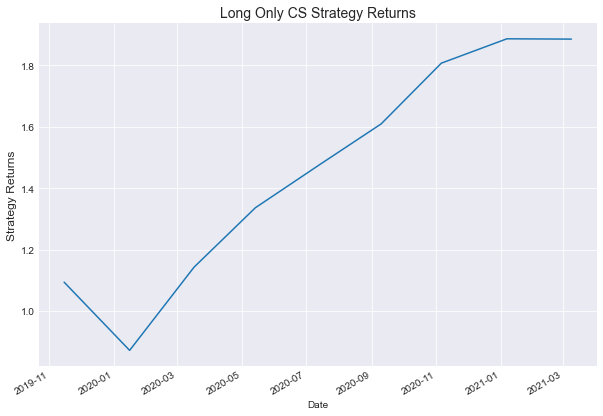

In [142]:
# Call the function strategy_long_only with below inputs
lookback_days = 175
skip_days = 5
hold_days = 41
portfolio_returns = strategy_long_only(
    filtered_stocks_prices, lookback_days, skip_days, hold_days)

portfolio_returns = portfolio_returns.dropna()

In [108]:
portfolio_returns['str_return'] = (portfolio_returns+1).cumprod()
cumulative_return = portfolio_returns['str_return'][-1] - 1
print("Доходность Long-only cross-sectional momentum strategy")
print("cumulative_return =", "%.2f%%" % (100 * cumulative_return))

Доходность Long-only cross-sectional momentum strategy
cumulative_return = 88.57%


In [109]:
portfolio_returns['str_return']

Date
2019-11-15    1.093633
2020-01-16    0.871334
2020-03-17    1.142683
2020-05-14    1.336147
2020-07-14    1.477052
2020-09-10    1.609377
2020-11-06    1.807412
2021-01-07    1.886713
2021-03-09    1.885690
dtype: float64